1. Use 20191101_market_data_with_label_v3.csv
2. Use n historial data to predict n+1 point
3. Use n historial data to predict n+m point

n, m customized


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [43]:
import keras

In [68]:
# Part 1 - Data preprocessing

# Importing the training set
training_set = pd.read_csv("Google_Stock_Price_Train.csv")



In [69]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [70]:
# input/ouputs of recurrent neural (input != date, stock price)
# but stock price at time t for input, and stock price t+1 for the output
# create a set only with the "Open" Google stock price, extract that column
# two-dimensional numpy array
training_set = training_set.iloc[:,1:2].values

In [71]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [40]:
# Feature Scaling + Normalization, since LSTM Several Sigmoid Activation function
# Sigmoid 0 and 1, as is the case in Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() # default is 0,1
# Fitting to training_set, scale training set, 
# transform we'll apply normalizationjust need min and max for normalization
training_set = sc.fit_transform(training_set)

In [46]:
training_set[0:15]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033]])

In [47]:
# Getting the inputs and the outputs, y_train is output, x_train is the input
X_train = training_set[0:1257]
y_train = training_set[1:1258]

# Reshaping inputs, input has a certain format (2D array, features)
# Changing the format of X_train into a 3D array, with a timestep
# Keras Documentation - why reshape? - 3D tensor with shape (batch_size, timesteps)
# time steps different between output and input time, input_dim dimension of input feature
X_train = np.reshape(X_train, (1257, 1, 1))

In [62]:
X_train[1]

array([[0.09701243]])

In [63]:
y_train[1]

array([0.09433366])

In [52]:
# Part 2 - Building the RNN

# Initialising the RNN
# predicting a continuous outcome, regression model
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
# use the mean square error
# regression won't be binary cross entropy, MSE for regression
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Trainign set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 1s 772us/step - loss: 0.2263
Epoch 2/200
1257/1257 [==============================] - 0s 251us/step - loss: 0.1547
Epoch 3/200
1257/1257 [==============================] - 0s 198us/step - loss: 0.1091
Epoch 4/200
1257/1257 [==============================] - 0s 275us/step - loss: 0.0831
Epoch 5/200
1257/1257 [==============================] - 0s 212us/step - loss: 0.0692
Epoch 6/200
1257/1257 [==============================] - 0s 229us/step - loss: 0.0624
Epoch 7/200
1257/1257 [==============================] - 0s 209us/step - loss: 0.0588
Epoch 8/200
1257/1257 [==============================] - 0s 253us/step - loss: 0.0569
Epoch 9/200
1257/1257 [==============================] - 0s 233us/step - loss: 0.0555
Epoch 10/200
1257/1257 [==============================] - 0s 283us/step - loss: 0.0542
Epoch 11/200
1257/1257 [==============================] - 0s 206us/step - loss: 0.0530
Epoch 12/200
1257/1257 [============================

1257/1257 [==============================] - 0s 140us/step - loss: 2.4684e-04
Epoch 182/200
1257/1257 [==============================] - 0s 215us/step - loss: 2.4888e-04
Epoch 183/200
1257/1257 [==============================] - 0s 248us/step - loss: 2.4753e-04
Epoch 184/200
1257/1257 [==============================] - 0s 245us/step - loss: 2.4717e-04
Epoch 185/200
1257/1257 [==============================] - 0s 213us/step - loss: 2.4661e-04
Epoch 186/200
1257/1257 [==============================] - 0s 216us/step - loss: 2.4819e-04
Epoch 187/200
1257/1257 [==============================] - 0s 223us/step - loss: 2.4867e-04 0s - loss: 2.6100e
Epoch 188/200
1257/1257 [==============================] - 0s 164us/step - loss: 2.4779e-04
Epoch 189/200
1257/1257 [==============================] - 0s 142us/step - loss: 2.4740e-04
Epoch 190/200
1257/1257 [==============================] - 0s 185us/step - loss: 2.4694e-04
Epoch 191/200
1257/1257 [==============================] - 0s 250us/step - 

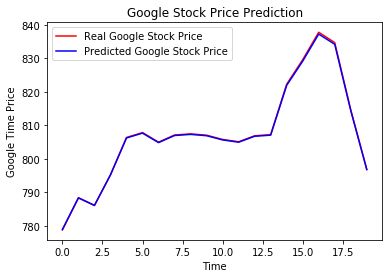

In [56]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
test_set = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = test_set.iloc[:,1:2].values

# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()


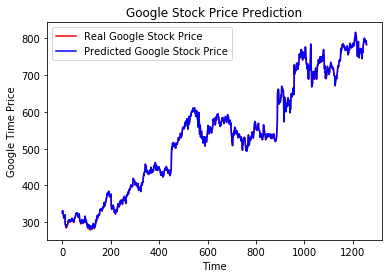

In [54]:
# Gettubg the real stock price 2012 - 2016
# Importing the training set
real_stock_price_train = pd.read_csv("Google_Stock_Price_Train.csv")
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

# visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

In [15]:
# Part 4 - Evaluating the RNN
# Evaluate of the RNN - learning to evaluate regression models
# Root Mean Square Error (RMSE)

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price_train[:1257], predicted_stock_price_train[:1257]))

In [16]:
rmse

0.7627558526510997

In [58]:
df_new = pd.read_csv('../../Project/market_data_std/20191101_market_data_with_label_v3.csv')

In [59]:
df_new.head()

,Time,Unnamed: 0,index,px_bid,px_ask,bid_size_total,ask_size_total,price,ls_amount,px_mid,...,momentum_0.3%_60s,2_direction_0.3%,momentum_0.1%*std_60s,2_direction_0.1%*std,2_direction_0.5%*std,momentum_0.5%*std_60s,direction_0.5%*std_30m,2_direction_0.3%*std,momentum_0.3%*std_60s,direction_0.3%*std_30m
0,2019-11-01 00:15:08,0,0,9133.5,9134.0,164887,10384518,9131.5,-4232,9133.75,...,0,-1,0,0,0,0,0,0,0,0
1,2019-11-01 00:15:09,1,1,9131.5,9132.0,214282,7153162,9131.5,0,9131.75,...,0,-1,0,0,0,0,0,0,0,0
2,2019-11-01 00:15:10,2,2,9131.5,9132.0,176705,2048333,9131.5,-23116,9131.75,...,0,-1,0,0,0,0,0,0,0,0
3,2019-11-01 00:15:11,3,3,9131.5,9132.0,690034,2378583,9131.5,0,9131.75,...,0,-1,0,0,0,0,0,0,0,0
4,2019-11-01 00:15:12,4,4,9131.0,9131.5,716634,1743535,9131.0,-18392,9131.25,...,0,-1,0,0,0,0,0,0,0,0


In [64]:
df_new.shape

(81632, 30)